In [32]:
import numpy as np
import math
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalization

In [18]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

# Flatten the imags

In [19]:
print(len(x_train))
print(len(x_test))

60000
10000


In [20]:
print(x_train.shape)


(60000, 28, 28)


In [21]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [22]:
x_test = x_test.reshape((len(x_test),
                        np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_train.shape)

(60000, 784)
(60000, 784)


In [23]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Visualize the data
 - Visualization is important in generative modeling since it confirms to us what our baseline data looks like.

In [24]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [25]:
class_names

['Zero',
 'One',
 'Two',
 'Three',
 'Four',
 'Five',
 'Six',
 'Seven',
 'Eight',
 'Nine']

In [31]:
def plot_data(file, num_images, images, labels):
    grid = math.ceil(math.sqrt(num_images))
    plt.figure(figsize=(grid*2,grid*2))
    for i in range(num_images):
        plt.subplot(grid,grid,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)     
        plt.imshow(images[i].reshape(28,28))
        plt.xlabel(class_names[labels[i]])      


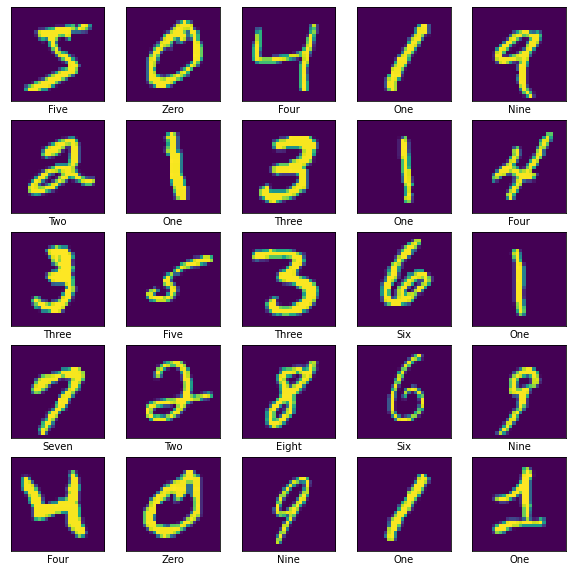

In [30]:
plot_data(file, 25, x_train, y_train)

# Build the VAE

- The vector size of (784,) is being reduced to a vector size of 32, which is the encoding_dim



In [34]:
encoding_dim = 32

### Build the encoder

In [54]:
input_img = Input(shape = (784,))
encoded = Dense(encoding_dim, 
                activation = "relu")(input_img)

encoder = Model(input_img, encoded)
encoded_input = Input(shape = (encoding_dim,))

# Build the decoder

In [55]:
decoded = Dense(784, activation = "sigmoid")(encoded)


In [56]:
autoencoder = Model(input_img, decoded)

In [59]:
decoder_layer = autoencoder.layers[-1]

In [62]:
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Training the AutoEncoder

In [65]:
autoencoder.compile(optimizer="adam",
                   loss = "mse")

In [66]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [67]:
autoencoder.fit(x_train,x_train,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (x_test,x_test))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
228/235 [============================>.] - ETA: 0s - loss: 0.0711WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fa36e9047a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full o

In [68]:
generated = autoencoder.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [73]:
image = 'generated.png'

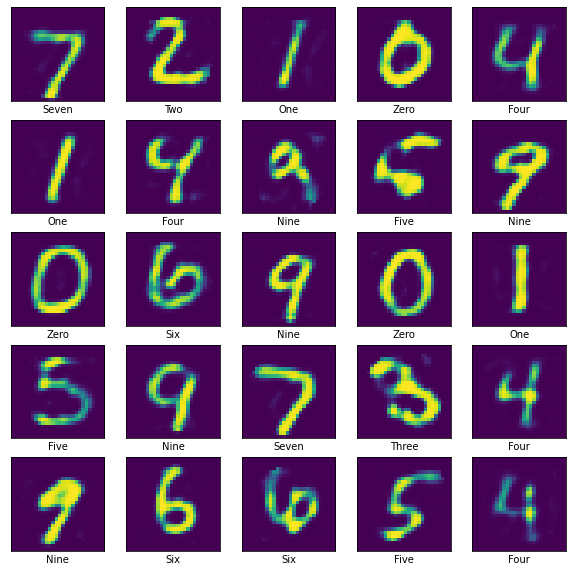

In [74]:
plot_data(image,25,generated,y_test)

In [75]:
x = Input(shape=(original_dim,))
x1 = Dense(original_dim//2, activation='relu')(x)
x2 = Dense(original_dim//3, activation='relu')(x1)
h = Dense(intermediate_dim, activation='relu')(x2)

NameError: name 'original_dim' is not defined